# ARIMA



In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm

import warnings

from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2

warnings.filterwarnings("ignore")

In [4]:
#importar dataset
df = pd.read_csv('../../datasets/Index2018.csv')
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
#copiar csv
df_copy = df.copy()
#transformar el valor de la columna de tiempo 
df_copy['date'] = pd.to_datetime(df_copy["date"],dayfirst=True)
#Agregar el la fecha como indice del dataset
df_copy = df_copy.set_index("date")
df_copy = df_copy.sort_index(ascending=True)
df_copy = df_copy.asfreq("b")
#rellenar valores nulos
df_copy = df_copy.fillna(method="ffill")

In [6]:
#separar data en train y test 
t_size = int(df_copy.shape[0]*0.8)
print(f"tamano de la data de entrenamiento : {t_size}")
df_train,df_test = df_copy.iloc[:t_size],df_copy.iloc[t_size:]

tamano de la data de entrenamiento : 5021


<Axes: xlabel='date', ylabel='nikkei'>

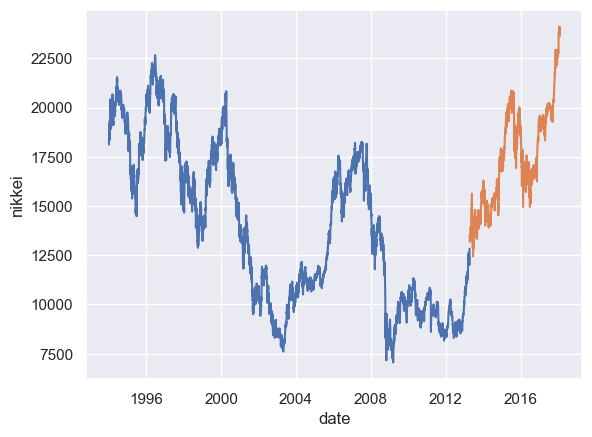

In [7]:
sns.lineplot(data=df_train,x='date',y='nikkei')
sns.lineplot(data=df_test,x='date',y='nikkei')

In [8]:
print(f"""
fecha inicio entranemiento : {np.min(df_train.index)}
fecha termino entrenamiento : {np.max(df_train.index)}

fecha incio testeo : {np.min(df_test.index)}
fecha termino testeo : {np.max(df_test.index)}
""")


fecha inicio entranemiento : 1994-01-07 00:00:00
fecha termino entrenamiento : 2013-04-05 00:00:00

fecha incio testeo : 2013-04-08 00:00:00
fecha termino testeo : 2018-01-29 00:00:00



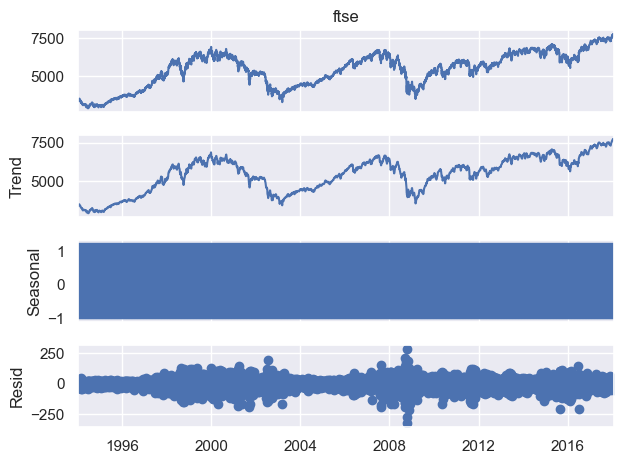

In [15]:
#estacionalidad
result = sm.tsa.seasonal_decompose(df_copy.ftse,model='aditive')
result.plot()
plt.show()

## LLR Test 

In [38]:
def llr_test(mod_1,mod_2,DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p 

In [10]:
#crear returns 
df_copy["market_value"] = df_copy.ftse
#cambio porcentual respecto al valor anterior 
df_copy["returns"] = df_copy.market_value.pct_change(1)*100

In [11]:
df_copy = df_copy.iloc[1:]

In [12]:
#modelo ar = 1 , i = 1 ma = 1 
model_ar_1_i_1_ma_1 = sm.tsa.ARIMA(df_copy.market_value,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34413.320
Date:                Sat, 05 Oct 2024   AIC                          68832.640
Time:                        14:35:18   BIC                          68852.873
Sample:                    01-10-1994   HQIC                         68839.651
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8292      0.042     19.912      0.000       0.748       0.911
ma.L1         -0.8641      0.037    -23.259      0.000      -0.937      -0.791
sigma2      3396.5005     36.195     93.838      0.000    3325.559    3467.442
===================================================================================
Ljung-Box (L1) (Q):                   2.84   Jarque-Bera (JB):              3729.23
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.32
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

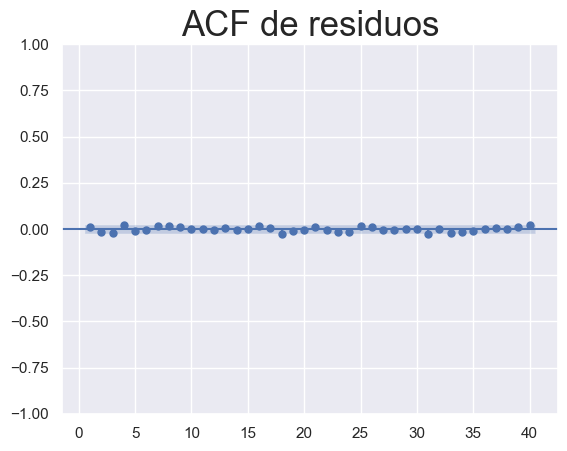

In [139]:
df_copy['res_arima_1_1_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df_copy.res_arima_1_1_1,zero=False,lags = 40)
plt.title("ACF de residuos",size=25)
plt.show()

In [24]:
# arima models con un alto lag 
arima_model_1_1_2 = sm.tsa.ARIMA(df_copy.market_value, order=(1,1,2))
results_model_1_1_2 = arima_model_1_1_2.fit()
arima_model_1_1_3 = sm.tsa.ARIMA(df_copy.market_value, order=(1,1,3))
results_model_1_1_3 = arima_model_1_1_3.fit()

arima_model_2_1_1 = sm.tsa.ARIMA(df_copy.market_value, order=(2,1,1))
results_model_2_1_1 = arima_model_2_1_1.fit()
arima_model_3_1_1 = sm.tsa.ARIMA(df_copy.market_value, order=(3,1,1))
results_model_3_1_1 = arima_model_3_1_1.fit()

In [25]:
print("ARIMA(1,1,2) : \t LL = ", results_model_1_1_2.llf, "\t AIC = ", results_model_1_1_2.aic)
print("ARIMA(1,1,3) : \t LL = ", results_model_1_1_3.llf, "\t AIC = ", results_model_1_1_3.aic)
print("ARIMA(2,1,1) : \t LL = ", results_model_2_1_1.llf, "\t AIC = ", results_model_2_1_1.aic)
print("ARIMA(3,1,1) : \t LL = ", results_model_3_1_1.llf, "\t AIC = ", results_model_3_1_1.aic)

ARIMA(1,1,2) : 	 LL =  -34409.271000709254 	 AIC =  68826.54200141851
ARIMA(1,1,3) : 	 LL =  -34406.30224130799 	 AIC =  68822.60448261598
ARIMA(2,1,1) : 	 LL =  -34409.123572344935 	 AIC =  68826.24714468987
ARIMA(3,1,1) : 	 LL =  -34407.78157346284 	 AIC =  68825.56314692568


In [40]:
#comparar resultados entre modelo ARIMA(1,1,2) v ARIMA(1,1,3) con DF = 1 
p_value = llr_test(results_model_1_1_2,results_model_1_1_3)
print(f"\n ARIMA(1,1,2) - ARIMA(1,1,3) test p-value {str(p_value)}")

#compar
p_value = llr_test(results_ar_1_i_1_ma_1,results_model_1_1_3,DF=3)
print(f"\n ARIMA(1,1,2) - ARIMA(1,1,3) test p-value {str(p_value)}")



 ARIMA(1,1,2) - ARIMA(1,1,3) test p-value 0.015

 ARIMA(1,1,2) - ARIMA(1,1,3) test p-value 0.003


In [41]:
#el modelo ARIMA(1,1,3) es el mejor modelo entre los otros

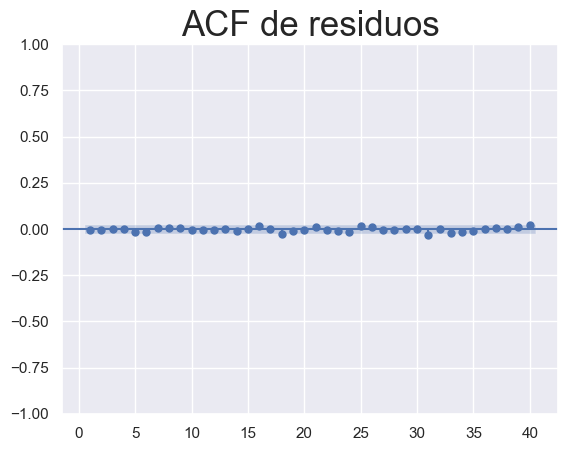

In [55]:
df_copy['res_arima_1_1_3'] = results_model_1_1_3.resid
fig = sgt.plot_acf(df_copy.res_arima_1_1_3,zero=False,lags = 40,alpha=0.05)
plt.title("ACF de residuos",size=25)
plt.show()

In [53]:
#ARIMA(5,1,1)
model_arima_5_1_1 = sm.tsa.ARIMA(df_copy.market_value, order=(5,1,1))
results_model_5_1_1 = model_arima_5_1_1.fit()

p_value = llr_test(result_model_1_1_3,results_model_5_1_1)
print(f"P-value ARIMA(1,1,3) - ARIMA(5,1,1) : {p_value}")

P-value ARIMA(1,1,3) - ARIMA(5,1,1) : 0.004


In [57]:
#comentarios : Usaremos el modelo ARIMA(5,1,1)
#calcular la dif 
df_copy['delta_prices'] = df_copy.market_value.diff(1)
df_copy

,spx,dax,ftse,nikkei,market_value,returns,res_arima_1_1_3,delta_prices
date,,,,,,,,
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000,-0.156704,3440.580000,NaN
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000,-0.779229,-26.700490,-26.810000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000,-1.222988,-41.408477,-41.750000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000,-0.356166,-13.080276,-12.010000
1994-01-14,474.910000,2151.05,3400.560000,18973.70,3400.560000,1.206842,36.485535,40.550000
...,...,...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774,0.212382,16.559685,16.386240
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966,-1.143311,-87.172787,-88.398808
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954,-0.360951,-29.454608,-27.589012


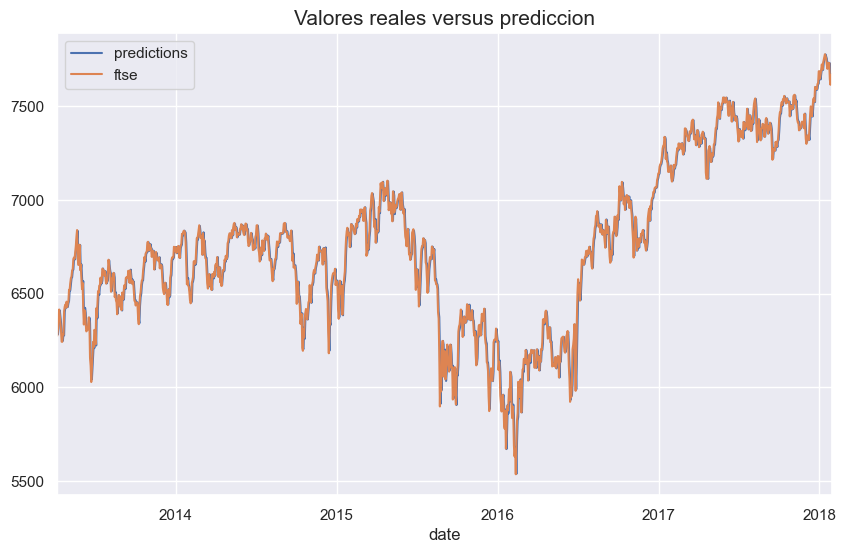

In [71]:
#predictions 
start = len(df_train)
end = len(df_train) + len(df_test) - 1

y_hat = results_model_1_1_3.predict(start,end,typ='lvls').rename("predictions")


fig,ax = plt.subplots(figsize=(10,6))
y_hat.plot(legend=True)
df_test['ftse'].plot(legend=True)
plt.title("Valores reales versus prediccion",size=15)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_test.ftse,y_hat,squared=False)
print(f"RMSE : {rmse}")

RMSE : 4.53106580680024
